# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Vira Rahmawati
- **Email:** virarahmawati553@gmail.com
- **ID Dicoding:** virhma

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren total pengguna rental sepeda setiap bulan pada tahun 2011 dan 2012?
- Pertanyaan 2 : Apakah total rental sepeda cenderung lebih tinggi pada hari tertentu dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_5060\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Wrangling

### Gathering Data

Melakukan load pada semua file data

In [2]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.shape

(731, 16)

In [4]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_df.shape

(17379, 17)

**Insight:**
- Tabel day_df dari data day.csv berisi 17 kolom atau feature dan 731 baris data
- Tabel hour_df dari data hour.csv berisi 17 kolom atau feature dan 17379 baris data

### Assessing Data

Menilai tabel day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi pada tabel day_df: ", day_df.duplicated().sum())

Jumlah duplikasi pada tabel day_df:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi pada tabel hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada tabel hour_df:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada duplicate data dan missing values baik pada tabel day_df dan tabel hour_df
- Namun terdapat tipe data yang tidak sesuai yaitu pada kolom dteday (baik pada tabel day_df dan hour_df). Kolom tersebut seharusnya direpresentasikan dengan tipe data datetime.

### Cleaning Data

Memperbaiki tipe data

- kolom dteday pada tabel day_df

In [14]:
dteday_day_columns = ["dteday"]

for column in dteday_day_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- kolom dteday pada tabel hour_df

In [16]:
dteday_hour_columns = ["dteday"]

for column in dteday_hour_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- tipe data pada kolom dteday sudah diperbaiki menjadi tipe data datetime
- tipe data semua kolom sudah sesuai

## Exploratory Data Analysis (EDA)

### Explore Data day_df dan hour_df

In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [19]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Total pengguna setiap bulan

In [20]:
# Menyusun dan menjumlahkan data total user berdasarkan bulan 
month_day = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
month_day_df = pd.DataFrame(month_day)
print(month_day_df)


    yr  mnth     cnt
0    0     1   38189
1    0     2   48215
2    0     3   64045
3    0     4   94870
4    0     5  135821
5    0     6  143512
6    0     7  141341
7    0     8  136691
8    0     9  127418
9    0    10  123511
10   0    11  102167
11   0    12   87323
12   1     1   96744
13   1     2  103137
14   1     3  164875
15   1     4  174224
16   1     5  195865
17   1     6  202830
18   1     7  203607
19   1     8  214503
20   1     9  218573
21   1    10  198841
22   1    11  152664
23   1    12  123713


In [21]:
# Data Tahun 2011 (Rental Harian)
month_2011_day_df = month_day_df[month_day_df['yr'] == 0]
# Data Tahun 2012 (Rental Harian)
month_2012_day_df = month_day_df[month_day_df['yr'] == 1]

print('\nData Rental Harian Tahun 2012')
print(month_2011_day_df)

print('\nData Rental Harian Tahun 2012')
print(month_2012_day_df)


Data Rental Harian Tahun 2012
    yr  mnth     cnt
0    0     1   38189
1    0     2   48215
2    0     3   64045
3    0     4   94870
4    0     5  135821
5    0     6  143512
6    0     7  141341
7    0     8  136691
8    0     9  127418
9    0    10  123511
10   0    11  102167
11   0    12   87323

Data Rental Harian Tahun 2012
    yr  mnth     cnt
12   1     1   96744
13   1     2  103137
14   1     3  164875
15   1     4  174224
16   1     5  195865
17   1     6  202830
18   1     7  203607
19   1     8  214503
20   1     9  218573
21   1    10  198841
22   1    11  152664
23   1    12  123713


In [22]:
# Menyusun dan menjumlahkan data total user berdasarkan bulan 
month_hour = hour_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
month_hour_df = pd.DataFrame(month_hour)
print(month_hour_df)

    yr  mnth     cnt
0    0     1   38189
1    0     2   48215
2    0     3   64045
3    0     4   94870
4    0     5  135821
5    0     6  143512
6    0     7  141341
7    0     8  136691
8    0     9  127418
9    0    10  123511
10   0    11  102167
11   0    12   87323
12   1     1   96744
13   1     2  103137
14   1     3  164875
15   1     4  174224
16   1     5  195865
17   1     6  202830
18   1     7  203607
19   1     8  214503
20   1     9  218573
21   1    10  198841
22   1    11  152664
23   1    12  123713


**Insight:**
- Split tabel day_df (rental harian) dan hour_df (rental per jam) menggunakan group_by menjadi data frame baru yang berisi total pengguna (cnt) di setiap bulan
- Kemudian split berdasarkan tahun yaitu tahun 2011 dan 2012
- Dari EDA dapat diketahui bahwa data day_df dan hour_df adalah data yang sama, hanya saja pada data hour_df memiliki atribut hr yang mana memberikan informasi berapa jam rental yang dilakukan user
- Sehingga untuk pertanyaan 1, cukup menggunakan tabel day_df
- Insight: setiap bulan memiliki total user yang berbeda

Total Pengguna Berdasarkan Hari

In [23]:
# Menyusun dan menjumlahkan data total user setiap hari dalam satu minggu 
weekday_hour_total = hour_df.groupby(['weekday'])['cnt'].sum().reset_index()
weekday_hour_total_df = pd.DataFrame(weekday_hour_total)
print(weekday_hour_total_df)

   weekday     cnt
0        0  444027
1        1  455503
2        2  469109
3        3  473048
4        4  485395
5        5  487790
6        6  477807


In [24]:
# Menyusun dan menjumlahkan data casual user setiap hari dalam satu minggu 
weekday_hour_casual = hour_df.groupby(['weekday'])['casual'].sum().reset_index()
weekday_hour_casual_df = pd.DataFrame(weekday_hour_casual)
print(weekday_hour_casual_df)

   weekday  casual
0        0  140521
1        1   70784
2        2   57843
3        3   57319
4        4   61460
5        5   78238
6        6  153852


In [25]:
# Menyusun dan menjumlahkan data total user setiap hari dalam satu minggu 
weekday_hour_registered = hour_df.groupby(['weekday'])['registered'].sum().reset_index()
weekday_hour_registered_df = pd.DataFrame(weekday_hour_registered)
print(weekday_hour_registered_df)

   weekday  registered
0        0      303506
1        1      384719
2        2      411266
3        3      415729
4        4      423935
5        5      409552
6        6      323955


**Insight:**
- Didapatkan data total user, casual user, dan registered user berdasarkan hari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren total pengguna rental sepeda setiap bulan pada tahun 2011 dan 2012?

Untuk menjawab pertanyaan ini maka perlu membuat grafik garis (line chart) mengenai total pengguna setiap bulan sepanjang tahun 2011 dan 2012

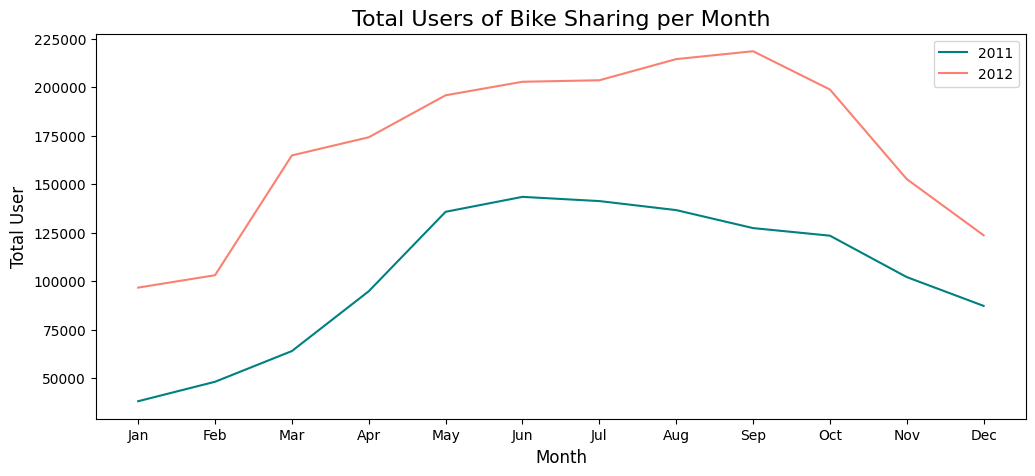

In [47]:
# Mendefinisikan variabel x dan y
x_var = month_2011_day_df['mnth']
y_2011 = month_2011_day_df['cnt']
y_2012 = month_2012_day_df['cnt']

# Plot menggunakan line chart
plt.figure(figsize=(12,5))
plt.plot(x_var, y_2011, label='2011', color='teal')
plt.plot(x_var, y_2012, label='2012', color='salmon')
plt.xlabel('Month', size=12)
plt.ylabel('Total User', size=12)

# Mengatur label sumbu x dengan nama bulan
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=months)
plt.legend()
plt.title('Total Users of Bike Sharing per Month', size=16)
plt.show()

### Pertanyaan 2: Apakah total rental sepeda cenderung lebih tinggi pada hari tertentu dalam seminggu?

Untuk menjawab pertanyaan ini, perlu untuk membuat visualisasi jumlah pengguna (casual, regristered, dan total) menggunakan clustered bar chart agar dapat dibandingkan

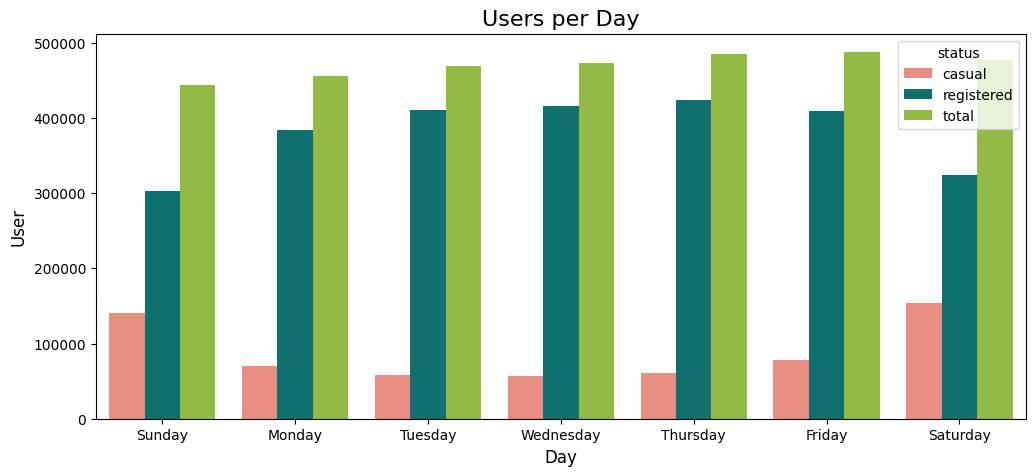

In [46]:
# Plot menggunakan clustered bar chart
# Menggabungkan tabel

# Tabel 1
casual_user = {'day': weekday_hour_casual_df['weekday'], 'count_user': weekday_hour_casual_df['casual']}
# Tabel 2
registered_user = {'day': weekday_hour_registered_df['weekday'], 'count_user': weekday_hour_registered_df['registered']}
# Tabel 3
total_user = {'day': weekday_hour_total_df['weekday'], 'count_user': weekday_hour_total_df['cnt']}

casual = pd.DataFrame(casual_user)
casual['status'] = 'casual'

registered = pd.DataFrame(registered_user)
registered['status'] = 'registered'

total = pd.DataFrame(total_user)
total['status'] = 'total'

combined = pd.concat([casual, registered, total], ignore_index=True)
colors_bar = {'casual': 'salmon', 'registered': 'teal', 'total': 'yellowgreen'}

# Membuat plot
plt.figure(figsize=(12,5))
sns.barplot(x='day', y='count_user', hue='status', data=combined, palette=colors_bar)

# Mengatur label sumbu x dengan nama hari
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(0, 7), labels=days)
plt.xlabel('Day', size=12)
plt.ylabel('User', size=12)
plt.title('Users per Day', size=16)
plt.show()

**Insight: Explanatory Analysis**
- Pertanyaan 1: Total pengguna rental sepeda setiap bulannya berbeda. Pada tahun 2011 total pengguna tertinggi terjadi pada bulan Juni, sedangkan pada tahun 2012 terjadi pada bulan September. Berdasarkan grafik garis, terlihat bahwa pada tahun 2012 total penggunan meningkat dari tahun 2011.
- Pertanyaan 2: Untuk pengguna yang teregistrasi, paling tinggi di hari kamis. Untuk pengguna yang tidak teregistrasi paling tinggi terjadi di hari sabtu. Untuk total pengguna (teregistrasi dan tidak teregistrasi) tertinggi terjadi pada hari Jumat.

## Analisis Lanjutan (Opsional)

Analisis ini dilakukan untuk menganalisis pola yang terjadi pada jumlah pengguna terhadap faktor atau feature lainnya

- Menentukan musim terbaik dan waktu terbaik untuk bersepeda berdasarkan jumlah pengguna terbanyak pada musim dan waktu tertentu

In [43]:
# Meninjau total user berdasarkan season (musim)
season_total = day_df.groupby(['season'])['cnt'].sum().reset_index()
season_total_df = pd.DataFrame(season_total)
season_total_df_sorted = season_total_df.sort_values(by='cnt', ascending=False)
print(season_total_df_sorted)

   season      cnt
2       3  1061129
1       2   918589
3       4   841613
0       1   471348


In [44]:
# Meninjau total user berdasarkan waktu 
hour_total = hour_df.groupby(['hr'])['cnt'].sum().reset_index()
hour_total_df = pd.DataFrame(hour_total)
hour_total_df_sorted = hour_total_df.sort_values(by='cnt', ascending=False)
print(hour_total_df_sorted)

    hr     cnt
17  17  336860
18  18  309772
8    8  261001
16  16  227748
19  19  226789
13  13  184919
12  12  184414
15  15  183149
14  14  175652
20  20  164550
9    9  159438
7    7  154171
11  11  151320
10  10  126257
21  21  125445
22  22   95612
23  23   63941
6    6   55132
0    0   39130
1    1   24164
2    2   16352
5    5   14261
3    3    8174
4    4    4428


In [53]:
top_5_hour_total = hour_total_df_sorted.head(4)
print(top_5_hour_total)

    hr     cnt
17  17  336860
18  18  309772
8    8  261001
16  16  227748


C:\Users\USER\AppData\Local\Temp\ipykernel_5060\4053042992.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=season_total_df_sorted, palette=colors_bar2 , ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_5060\4053042992.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=top_5_hour_total, palette=colors_bar2 , ax=ax[1])


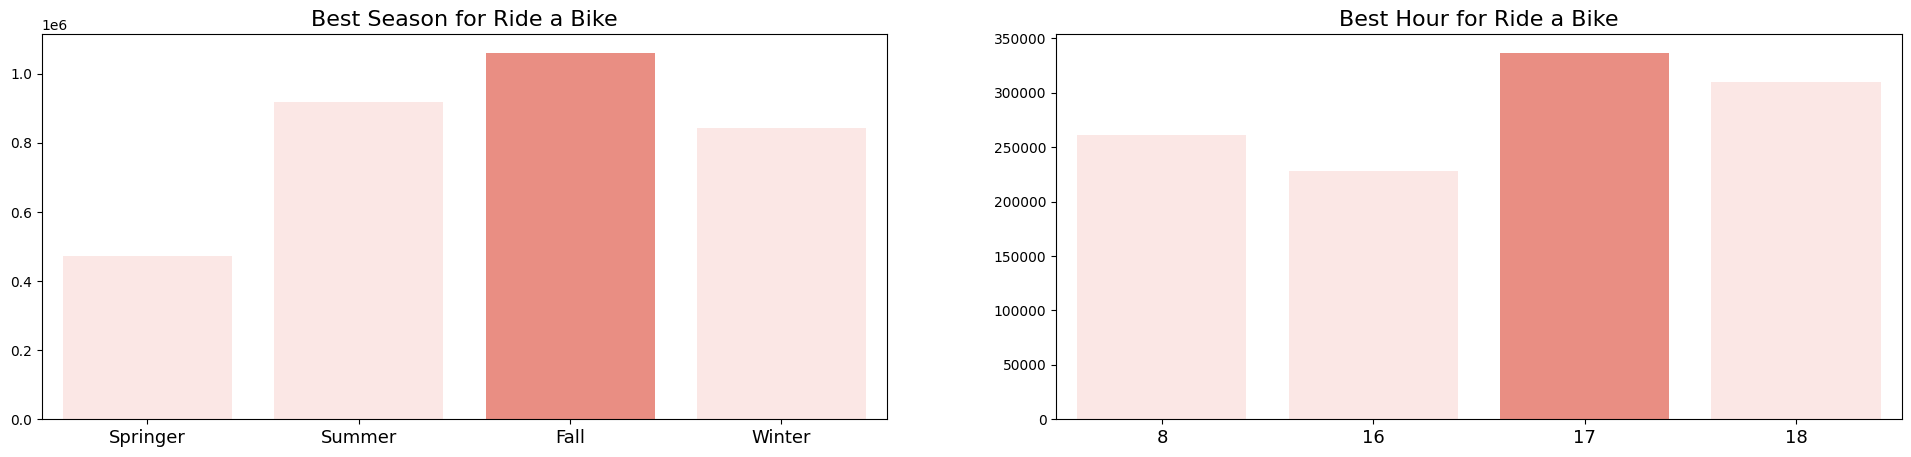

In [71]:
# Membuat visualisasi data untuk melihat dengan jelas jumlah pengguna terbanyak terjadi pada musim dan waktu apa
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,5))

colors_bar2 = ["mistyrose", "mistyrose", "salmon", "mistyrose"]
seasons = ['Springer', 'Summer', 'Fall', 'Winter']

sns.barplot(x="season", y="cnt", data=season_total_df_sorted, palette=colors_bar2 , ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Best Season for Ride a Bike", loc="center", fontsize=16)
ax[0].set_xticks(ticks=range(0,4), labels=seasons)
ax[0].tick_params(axis ='x', labelsize=13)

sns.barplot(x='hr', y='cnt', data=top_5_hour_total, palette=colors_bar2 , ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Best Hour for Ride a Bike", loc="center", fontsize=16)
ax[1].tick_params(axis ='x', labelsize=13)

plt.show()

## Conclusion

- Conclution pertanyaan 1:
Total pengguna (users) rental sepeda setiap bulannya berbeda-beda dan cenderung terjadi kenaikan di pertengahan tahun dan rendah di awal dan penghujung tahun. Kemudian terjadi kenaikan total users yang signifikan pada tahun 2012 dibandingkan tahun 2011.
- Conclution pertanyaan 2:
Total pengguna setiap harinya tidak jauh berbeda. Akan tetapi secara keseluruhan, total pengguna rental sepeda terbanyak di hari Jumat. Adapun khusus pengguna teregistrasi terbanyak di hari Kamis, dan pengguna tidak teregistrasi meningkat di hari Sabtu.

- Conclusion analisis tambahan:
Musim terbaik untuk bersepeda ialah pada musim gugur (Fall), hal ini dibuktikan dengan jumlah pengguna tertinggi pada musim gugur. Adapun waktu terbaik untuk bersepeda ialah sore hari sekitar pukul 17.00.